In [21]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, log_loss

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [22]:
# Завантажити дані з файлу glass.csv в блок даних Pandas (pandas.read_csv)
df = pd.read_csv("glass.csv")

In [23]:
# Роздрукувати перші 10 рядків даних (pandas.DataFrame.head).
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [24]:
# Вивести інформацію про набір даних (pandas.DataFrame.info).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [25]:
# Навести статистику за даними (pandas.DataFrame.describe)
df.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

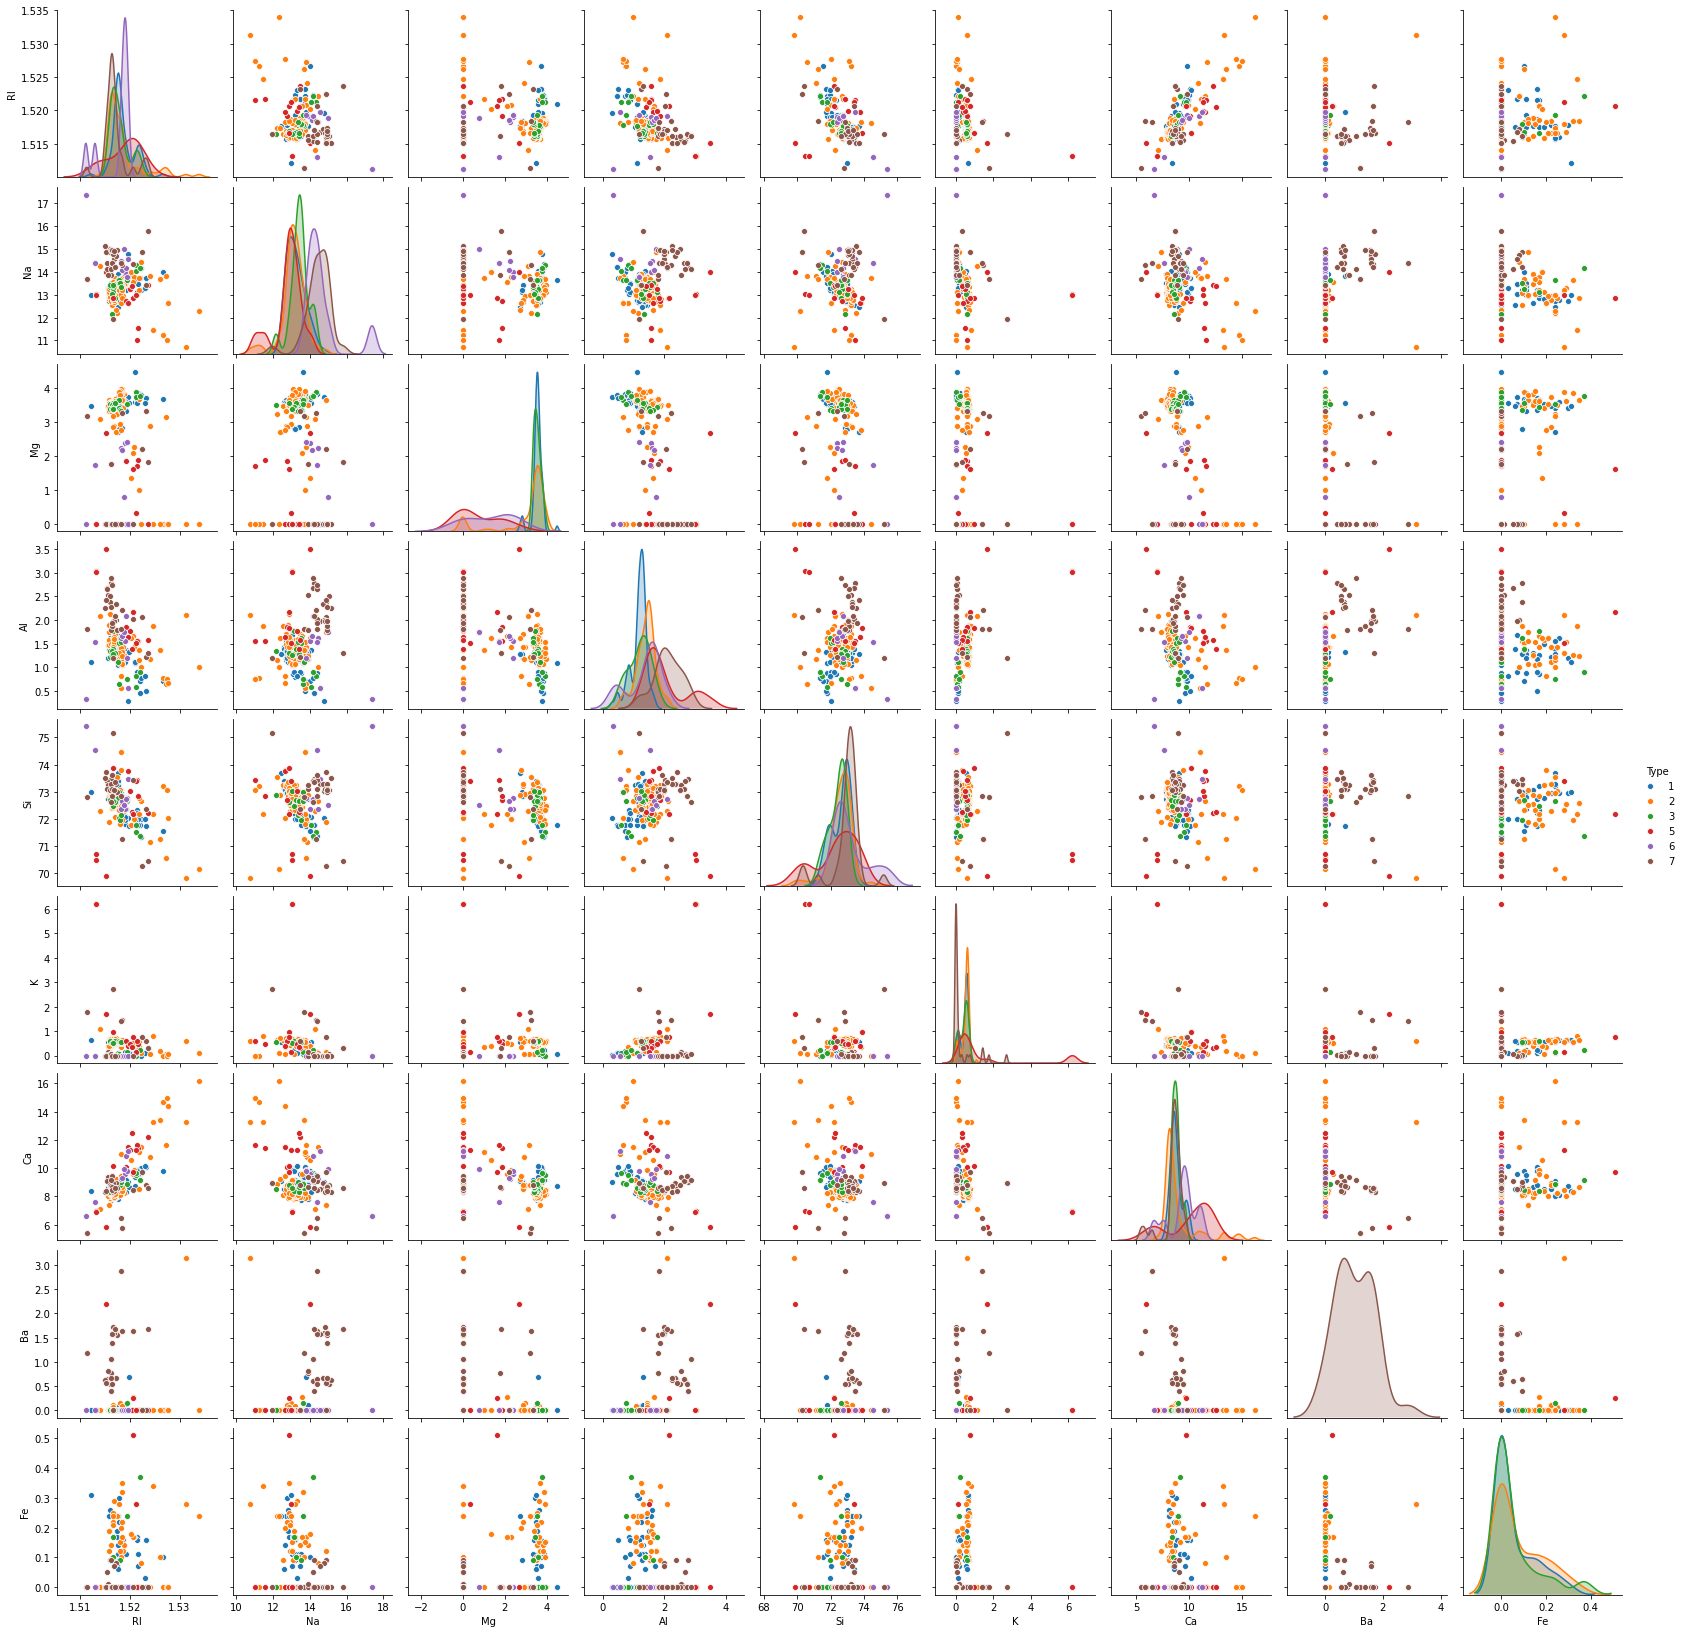

In [26]:
# Побудувати попарні залежності в наборі даних 
# та зробити висновки на їх основі (seaborn.pairplot)
sb.pairplot(df, hue='Type')

# TODO висновки тут
# Смотря на графики, расположенные по диагонали, можно предположить, что свойства распределены по нормальному закону с разными параметрами.
# Также, можно заметить некоторые всплески, не характерные для нормального закона распределения. Я думаю, что является проявлением некоторого шума. 

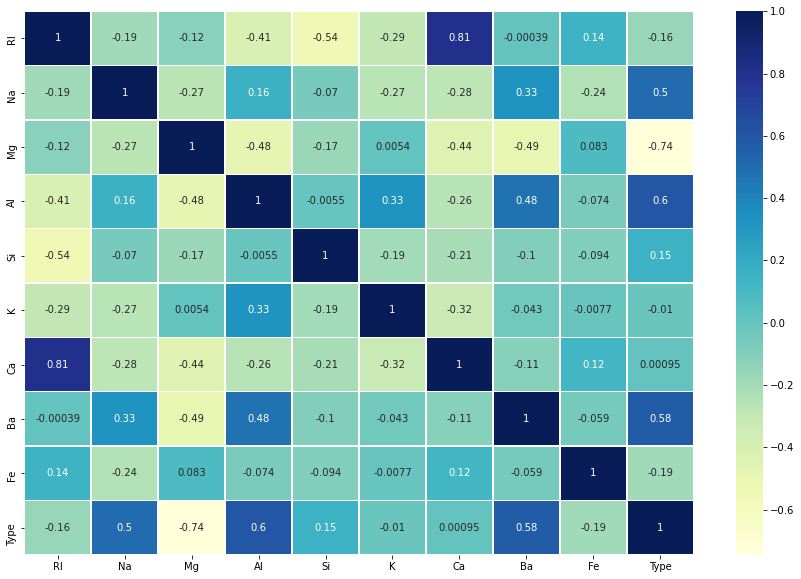

In [28]:
# Побудувати мапу висот кореляційної матриці та описати її інтерпретацію 
# (pandas.DataFrame.corr, seaborn.heatmap)
plt.subplots(figsize=(15,10))
sb.heatmap(df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

# TODO описати тут
# Из карті высот корреляционной матрицы можно сделать следующие выводы.
# Материал кальций имеет сильную связь с коеф-том преломления света. Кремний и алюминий имеют отрицательную связь с коеф-ом преломления. 
# Барий, алюминий и натрий имею среднюю связь с типом стекла. Магний в данном случае отрицательно связан.
# Также по всей таблице видны всплески связи между элементами ( например, Магний с Калием, Барием и Алюминием ), что говорит о соотношении элементов в стекле (кол-во одного элемента влияет на кол-во другого в одном стекле).
#

In [36]:
# Порахувати кількість унікальних міток 
# та зберегти їх для подальшого використання (pandas.DataFrame.unique).
unique_labels = df['Type'].unique()
n_classes = len(unique_labels)
print (unique_labels)
print (n_classes)

[1 2 3 5 6 7]
6


In [37]:
# Перевірити, чи є пропущені дані. Якщо є, видалити відповідні рядки (pandas.DataFrame.isnull).
df.isnull().values.any()

False

In [38]:
# Відокремити цільовий стовпець Type та матрицю ознак та роздрукувати їх розмірності.
X = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values
c
print(X.shape, " ", y.shape)

(214, 9)   (214,)


In [39]:
# Розділити дані на тренувальний та тестовий набір у співвідношенні 2:1
# (sklearn.model_selection.train_test_split)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=0) 

In [40]:
# Провести стандартизацію даних тренувального та тестового наборів
# (sklearn.preprocessing.StandardScaler)
sc = preprocessing.StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
# Побудувати класифікатор логістичної регресії з параметрами C=1e5, solver='lbfgs',
# max_iter=5000, multi_class='multinomial' та натренувати його 
# (sklearn.linear_model.LogisticRegression)
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)

In [42]:
# Оцінити якість класифікації за допомогою метрики accuracy
# (sklearn.linear_model.LogisticRegression.score).
logreg.score(X_test_std, y_test)

0.6056338028169014

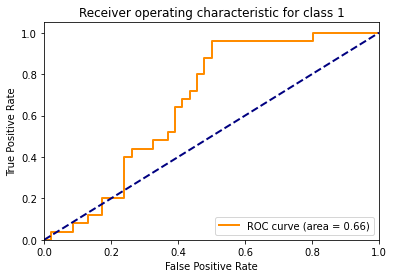

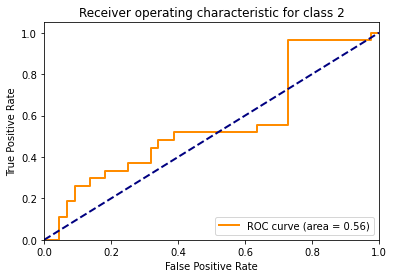

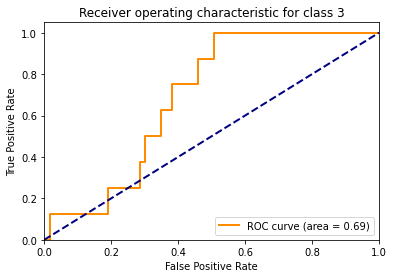

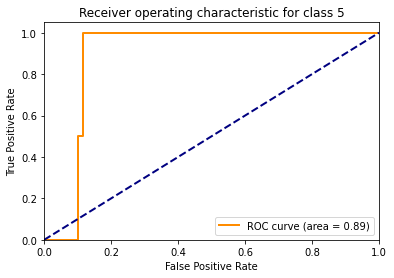

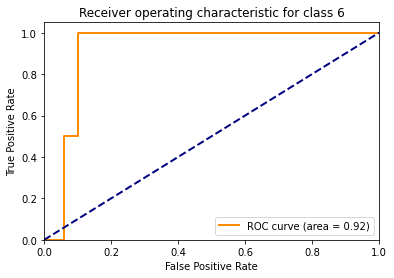

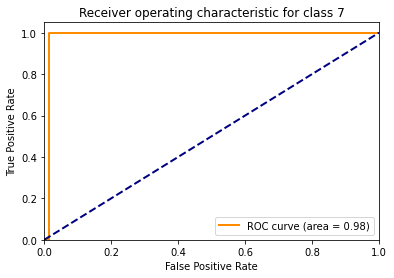

In [43]:
# За допомогою roc_auc_score побудувати ROC-криву для кожного класу. 
# Які висновки можна зробити на їх основі?
binarized_labels = preprocessing.label_binarize(y_test.tolist(), classes=unique_labels)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class ' + str(unique_labels[i]))
    plt.legend(loc="lower right")
    plt.show()

# TODO висновки тут
# Из графиков видно, что модель имеет средние показатели для первого, второго и третьего классов (площади больше 0.5), однако, это можно считать плохим результатом,
# так как для остальных классов модель натренирована очень хорошо (если посчитать, что коеф-т 0.89 для 5-го класса все таки относоится к очень хорошему результату (<0.9))


In [44]:
# Навести значення accuracy, precision, recall, F-score оцінок моделі
# (sklearn.metrics.classification_report)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.73      0.64      0.68        25
           2       0.62      0.59      0.60        27
           3       0.22      0.25      0.24         8
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00         2
           7       0.75      0.86      0.80         7

    accuracy                           0.61        71
   macro avg       0.59      0.64      0.61        71
weighted avg       0.62      0.61      0.61        71



In [45]:
# Провести перехресну перевірку отриманої моделі та зробити висновки 
# (sklearn.model_selection.cross_val_score).
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))                               

[0.55172414 0.75862069 0.62068966 0.53571429 0.67857143]
Accuracy: 0.63 (+/- 0.16)


In [ ]:
# Побудувати ще 5 різних класифікаторів, змінюючи параметри tol та C, 
# оцінити їх якість, зробити висновок впливу зміни параметрів.
# TODO
# Были построены множество классификаторов, среди которых выбраны 6 штук. Они наглядно показывают влияние параметра С на точность.
# Были замечены такие особенности: При уменьшении параметра С (0.1 0.01 и т.д) точность падает, предпосылок к росту нет.
# Сначала был замечен рост точности до С = 2. Поэкспериментировав со значениями, был выбран С = 1.9, что и дало лучший результат.
# Увеличение параметра больше 2 давало хуже результат.
# График построен в файле Предположение.png

In [75]:
# Первый классификатор

logreg = LogisticRegression( C=0.1, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)
report = classification_report(y_test, y_pred)
print(report)
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

           1       0.65      0.60      0.63        25
           2       0.56      0.81      0.67        27
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.62        71
   macro avg       0.35      0.40      0.37        71
weighted avg       0.53      0.62      0.57        71

[0.4137931  0.5862069  0.65517241 0.5        0.71428571]
Accuracy: 0.57 (+/- 0.21)


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# Второй классификатор

logreg = LogisticRegression( C=1, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)
report = classification_report(y_test, y_pred)
print(report)
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

           1       0.59      0.64      0.62        25
           2       0.58      0.67      0.62        27
           3       0.00      0.00      0.00         8
           5       0.33      0.50      0.40         2
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         7

    accuracy                           0.61        71
   macro avg       0.50      0.55      0.52        71
weighted avg       0.55      0.61      0.58        71

[0.5862069  0.72413793 0.72413793 0.57142857 0.71428571]
Accuracy: 0.66 (+/- 0.14)


In [70]:
# Третий классификатор

logreg = LogisticRegression( C=5, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)
report = classification_report(y_test, y_pred)
print(report)
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
TP/(TP+FP)


              precision    recall  f1-score   support

           1       0.55      0.64      0.59        25
           2       0.64      0.67      0.65        27
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.62        71
   macro avg       0.59      0.63      0.61        71
weighted avg       0.57      0.62      0.59        71

[0.5862069  0.79310345 0.72413793 0.60714286 0.67857143]
Accuracy: 0.68 (+/- 0.15)


In [68]:
# Четвертый классификатор

logreg = LogisticRegression( C=10, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)
report = classification_report(y_test, y_pred)
print(report)
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

           1       0.57      0.64      0.60        25
           2       0.62      0.67      0.64        27
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.62        71
   macro avg       0.59      0.63      0.61        71
weighted avg       0.57      0.62      0.59        71

[0.55172414 0.79310345 0.72413793 0.60714286 0.67857143]
Accuracy: 0.67 (+/- 0.17)


In [67]:
# Пятый классификатор

logreg = LogisticRegression(C=1.9, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)
report = classification_report(y_test, y_pred)
print(report)
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

           1       0.57      0.64      0.60        25
           2       0.58      0.67      0.62        27
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         7

    accuracy                           0.61        71
   macro avg       0.53      0.55      0.54        71
weighted avg       0.55      0.61      0.58        71

[0.65517241 0.75862069 0.75862069 0.57142857 0.71428571]
Accuracy: 0.69 (+/- 0.14)


In [80]:
# Шестой классификатор

logreg = LogisticRegression( C=10, solver='lbfgs', multi_class='multinomial', max_iter=5000)
y_score = logreg.fit(X_train_std, y_train).decision_function(X_test_std)
y_pred = logreg.predict(X_test_std)
report = classification_report(y_test, y_pred)
print(report)
scores = model_selection.cross_val_score(logreg, X_train_std, y_train, cv=5)
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

           1       0.57      0.64      0.60        25
           2       0.62      0.67      0.64        27
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.62        71
   macro avg       0.59      0.63      0.61        71
weighted avg       0.57      0.62      0.59        71

[0.55172414 0.79310345 0.72413793 0.60714286 0.67857143]
Accuracy: 0.67 (+/- 0.17)
